In [1]:
# plot cluster statistics from ClusterFind
# mass, 
# Box2_hr
# snap 132 z=0.10


In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib as mpl

label_size = 15

mpl.rcParams['legend.fontsize'] = label_size - 5
mpl.rcParams['axes.labelsize'] = label_size 

mpl.rcParams['xtick.labelsize'] = label_size - 2
mpl.rcParams['ytick.labelsize'] = label_size - 2

mpl.rcParams['axes.labelpad'] = 10

In [3]:
cluster_df = pd.read_csv("clusterfind_dataset.csv",delimiter=",")
print(cluster_df.columns)
print(cluster_df.shape)


min_mass = min(cluster_df.M500_msolh)
max_mass = max(cluster_df.M500_msolh)

min_lum = min(cluster_df.Lx_ergs)
max_lum = max(cluster_df.Lx_ergs)

min_temp = min(cluster_df.T_kev)
max_temp = max(cluster_df.T_kev)
print("")
print("M500 limits: ({:.2e},{:.2e})".format(min_mass,max_mass))
print("Lx limits: ({:.2e},{:.2e})".format(min_lum,max_lum))
print("Temp limits: ({:.2f},{:.2f})".format(min_temp,max_temp))

Index(['# id', 'snap_id', 'uid', 'x', 'y', 'z', 'x_pixel', 'y_pixel',
       'i_sector', 'M500_msolh', 'r500_kpch', 'gas_frac', 'star_frac', 'T_kev',
       'Lx_ergs', 'Y500c', 'M_sat_M_cD', 'cshift', 'vx', 'vy', 'vz '],
      dtype='object')
(613, 21)

M500 limits: (5.69e+13,1.05e+15)
Lx limits: (7.84e-02,2.95e+01)
Temp limits: (1.27,9.30)


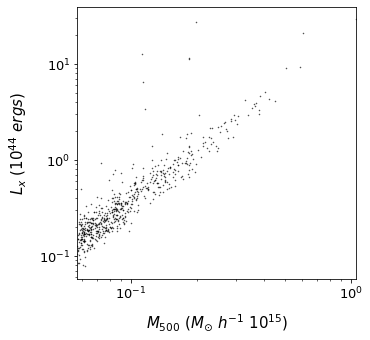

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(cluster_df.M500_msolh/1e15,cluster_df.Lx_ergs,s=1,color='black',alpha=0.75,marker=".")
plt.xlabel("$M_{500} \\ (M_{\odot}\\ h^{-1} \\ 10^{15})$")
plt.ylabel("$L_{x} \\ (10^{44} \\ ergs)$")
plt.xscale("log"),plt.yscale("log")
plt.savefig("cluster_lum-mass.png",dpi=200)
plt.xlim(min(cluster_df.M500_msolh/1e15),max(cluster_df.M500_msolh/1e15))
plt.show()
plt.close()

# for us luminosity is the independent variable, mass if dependent

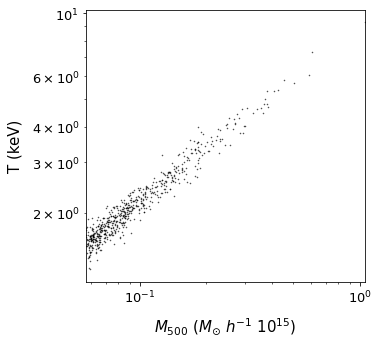

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(cluster_df.M500_msolh/1e15,cluster_df.T_kev,s=1,color='black',alpha=0.75,marker=".")
plt.xlabel("$M_{500} \\ (M_{\odot}\\ h^{-1} \\ 10^{15})$")
plt.ylabel("T (keV)")
plt.xlim(min(cluster_df.M500_msolh/1e15),max(cluster_df.M500_msolh/1e15))
plt.yscale('log'), plt.xscale('log')
plt.savefig("cluster_temp-mass.png",dpi=200)
plt.show()
plt.close()

Next steps:
- do log-log fit to luminosity and temp. to predict mass => expect power-law relationship
- log T = slope * log M + intercept
- log L = slope * log M + intercept

- take logs yourself (base10)
- can you use temperature or luminosity to predict mass?
- plot a PDF of errors (probability density function) or hist. of mass errors
- mass error = logpredicted_mass - logtrue_mass
- should see mass errors as gaussian